<a href="https://colab.research.google.com/github/JuanDa14Sa/IAM/blob/main/Trabajo_2_IAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 2-Introducción al aprendizaje de maquina**

**Juan David Sánchez Murcia**

**Exercise 1.12**

Lo más que podemos dar es la opción $c)$, ya que no hay garantía de encontrar una función $g$ cuyo error dentro del dataset se aproxime a 0, es decir $E_{in}(g)\approx 0$.

Si logramos encontrar dicha hipótesis $g$ entonces la desigualdad de Hoeffding es la que nos permite decir que aproximamos de forma probablemente aproximandamente correcta a la función objetivo $f$.

**Problem 1.2**

*   a) Por definición de la función $h(x)=sign(w^Tx)$ las regiones estan separadas por la linea $w^Tx=0$, más especificamente

$$w_0+w_1x_1+w_2x_2$$ 

de donde 
$$x_2=\frac{-w_0}{w_2}-\frac{w_1}{w_2}x_1$$
luego $a=-\frac{w_1}{w_2}$ y $b=-\frac{w_0}{w_2}$.

*   b) Vemos que la recta que separa las regiones es identica, sin embargo las regiones estan invertidas, por ejemplo, $h(x)=1$ que notamos de color azul:

Text(0.5, 1.0, 'Caso 2')

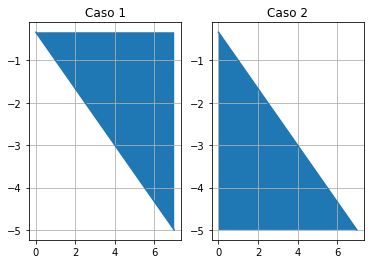

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


x=np.arange(0,8)
y=-(1/3)-(2/3)*x
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(x,y)
plt.fill_between(x,y, np.max(y))
plt.title("Caso 1")

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(x,y)
plt.fill_between(x, y, np.min(y))
plt.title("Caso 2")

**Problem 1.4**

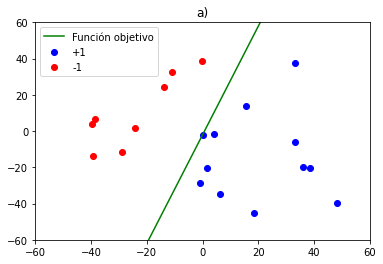

In [10]:
##Función objetivo w=[-2,3,-1]
def generate_dataset(num_points,lower_bound,upper_bound,dim):
  lb,ub=lower_bound,upper_bound
  x1 = np.arange(lb, ub, 0.01)
  data=np.random.uniform(lb,ub,(num_points,dim))
  values=[1 if -2+pair[0]*3-pair[1]>0 else -1 for pair in data]
  positive =data[-2+data[::,0]*3-data[::,1]>0]
  negative =data[-2+data[::,0]*3-data[::,1]<0]
  return data,positive,negative,values,x1

data,positive,negative,values,x1=generate_dataset(20,-50,50,2)

fig, ax=plt.subplots()
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax.scatter(positive[::,0],positive[::,1],c='b',label='+1')
ax.scatter(negative[::,0],negative[::,1],c='r',label='-1')
ax.plot(x1,3*x1-2,'g',label='Función objetivo')
ax.set_title('a)')
ax.legend()
plt.show()

*   b) En algunos casos la hipótesis se acerca bastante a la función objetivo, sin embargo hay casos en los que separa los puntos de forma correcta pero no se acerca a la función objetivo.

*   c) Se observan resultados similares al cambiar de dataset.

Peso w:  [ 0.03580053 -1.92137605  1.        ]   Iteraciones:  3


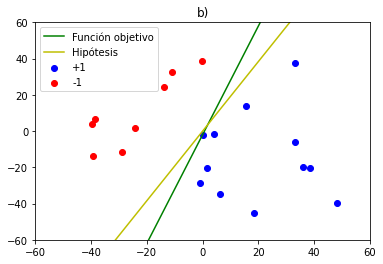

In [11]:
##Perceptron algorithm
def perceptron(dataset,true_values,max_iter,dim,random,print_info):
  w=np.random.rand(dim+1)
  for i in range(max_iter):
    well_class=set()
    indx=np.arange(dataset.shape[0])
    if random:
      indx=np.random.choice(np.arange(dataset.shape[0]), dataset.shape[0], replace=False)
    for ind in indx:
      x_tmp,y_tmp=dataset[ind],true_values[ind]
      x_tmp=np.insert(x_tmp,0,1)
      pred=np.dot(w.T,x_tmp)*y_tmp
      #if pred<lb:
       # pred=-lb
      if pred<0:
        w=w+y_tmp*x_tmp
        break
      else: 
        well_class.add(ind)
    if len(well_class)==dataset.shape[0]:
      break
  w = w/w[-1]
  if print_info:
    print('Peso w: ',w,'  Iteraciones: ',i)
    #print('Well classified points: ',well_class)
  return w,i


def plot_perceptron2d(w,positive,negative,x1,xlim,ylim,num_punto):
  fig, ax=plt.subplots()
  ax.set_xlim(-xlim,xlim)
  ax.set_ylim(-ylim,ylim)
  ax.scatter(positive[::,0],positive[::,1],c='b',label='+1')
  ax.scatter(negative[::,0],negative[::,1],c='r',label='-1')
  ax.plot(x1,3*x1-2,'g',label='Función objetivo')
  ax.plot(x1,-(w[1]*x1+w[0]),'y',label='Hipótesis')
  ax.set_title(num_punto)
  ax.legend()
  plt.show()

w,i=perceptron(data,values,100,2,False,True)
plot_perceptron2d(w,positive,negative,x1,60,60,'b)')

*     d) Vemos que ahora la hipótesis se aproxima a la función objetivo.

Peso w:  [ 0.56617433 -2.9605567   1.        ]   Iteraciones:  32


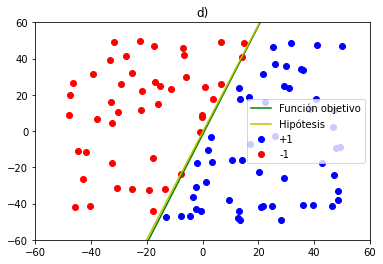

In [12]:
data,positive,negative,values,x1=generate_dataset(100,-50,50,2)
w,i=perceptron(data,values,1000,2,False,True)

plot_perceptron2d(w,positive,negative,x1,60,60,'d)')

*   e) La hipótesis es casi igual a la función objetivo y se usa un mayor número de iteraciones para que el algoritmo converja.

Peso w:  [ 1.17580242 -2.76952319  1.        ]   Iteraciones:  999


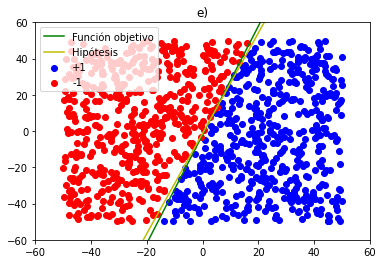

In [13]:
data,positive,negative,values,x1=generate_dataset(1000,-50,50,2)
w,i=perceptron(data,values,1000,2,False,True)

plot_perceptron2d(w,positive,negative,x1,60,60,'e)')

*   f) Vemos que el algortimo converge en un mayor número de iteraciones, además de que el proceso es significativamente más lento, esto se debe al aumento de la dimensión a 10.

In [6]:
data,positive,negative,values,x1=generate_dataset(1000,-100,100,10)
w,i=perceptron(data,values,100000,10,False,True)

Peso w:  [  -8.97304242  388.98605935 -127.72337853   -0.83177442   -2.71088049
   -0.63323731    2.58819034   -7.73213351    0.54312298   -4.84703015
    1.        ]   Iteraciones:  1673


*   g) Parece que la media de iteraciones es de 1750.

(array([ 1.,  0.,  7.,  4.,  7., 17., 18., 27., 12.,  7.]),
 array([ 326. ,  529.9,  733.8,  937.7, 1141.6, 1345.5, 1549.4, 1753.3,
        1957.2, 2161.1, 2365. ]),
 <a list of 10 Patch objects>)

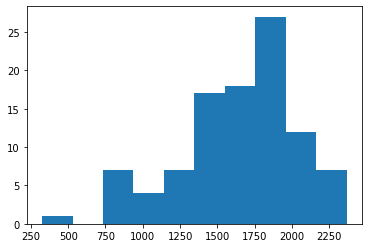

In [7]:
num_iter=[]
for i in range(100):
  _,i=perceptron(data,values,50000,10,True,False)
  num_iter.append(i)

plt.hist(num_iter)


*   h) Vemos que si aumenta $N$, es decir el número de puntos, la hipótesis se aproxima más a la función objetivo $f$ y el tiempo de ejecución aumenta. De igual forma, si aumentamos la dimensión de los puntos $d$ entonces el tiempo de ejecución también aumenta.

**Problem 1.6**

*   a) Como sacamos las canincas de forma independiente entonces $P(v=0)=(1-\mu)^10$, de donde obtenemos 


*   $P(v=0)=0.5987369392383789$ cuando $\mu=0.05$
*   $P(v=0)=0.0009765625$ cuando $\mu=0.5$
*   $P(v=0)=0.0000001024$ cuando $\mu=0.8$

*   b) Queremos saber la probabilidad de que al menos en alguna muestra no obtengamos ninguna canica roja, llamemos a este evento $A$, esto es lo mismo que hacer el complemento de obtener al menos una canica roja en todas las muestras, es decir $P(v>0)=1-P(v=0$)=1-(1-\mu)^10, por razonamiento similar al anterior punto, dado que los eventos son independientes entonces la probabilidad que queremos está dada por
$$P(A)=1-(1-(1-\mu)^{10})^{1000}.$$
Por lo tanto:
*   $P(A)\approx 1$ cuando $\mu=0.05$
*   $P(A)=0.0930826565089588$ cuando $\mu=0.5$
*   $P(A)=0.00001023994809566162362179839$ cuando $\mu=0.8$

*   c) Repitiendo para 1000000 muestras independientes obtenemos:
*   $P(A)\approx 1$ cuando $\mu=0.05$
*   $P(A)\approx 1$ cuando $\mu=0.5$
*   $P(A)=0.09733159265$ cuando $\mu=0.8$


**Problem 1.9**
*   a) Usando la desigualdad de Markov tenemos que
$$P(t\geq a)=P(e^{st}\geq e^{sa})\leq E(e^{st})e^{-sa}$$ 

*   b) Tomando $t=uN$ y usando la desigualdad demostrada anteriormente obtenemos 

$$\begin{align*} P(uN\geq \alpha N)&\leq E(e^{suN})e^{-s\alpha N} \\
P(u\geq \alpha)&\leq E(e^{s\sum_{n=1}^Nu_n}) e^{-s\alpha N} \\
P(u\geq \alpha)&\leq E(\prod_{n=1}^ne^{su_n})e^{-s\alpha N}  \\
P(u\geq \alpha)&\leq \prod_{n=1}^NE(e^{su_n})e^{-s\alpha N} \\
P(u\geq \alpha)&\leq (E(e^{su_n})e^{-s\alpha })^N\end{align*}$$

*   c) Por definición de la esperanza obtenemos 
$$U(s)=P(u_n=0)e^0+P(u_n=1)e^s=\frac{1+e^s}{2}$$
ahora, derivando la función $U(s)e^{-s\alpha}$ con respecto a $s$ e igualando a $0$ tenemos 
$$s=ln\left(\frac{\alpha}{1-\alpha}\right)$$
para $0<\alpha<1$.

*    d) Note que 
$$E(u)=E\left(\frac{1}{N}\sum_{n=1}^N u_n \right)=\frac{1}{N}\sum_{n=1}^N E(u_n)=\frac{1}{2},$$
entonces utilizando la desigualdad obtenida en el punto $b)$ con $\alpha=E(u)+\epsilon$ tenemos que
$$P(u\geq \alpha)\leq (e^{-s\alpha}U(s))^N$$
así que tomando $s=ln\left(\frac{\alpha}{1-\alpha}\right)$ obtenemos
$$\begin{align*} e^{-s\alpha}U(s)&=\frac{1}{2}e^{-s\alpha} (1+e^s)\\
&=\frac{1}{2}e^{-\alpha ln\left(\frac{\alpha}{1-\alpha}\right)}\left(1+e^{ln\left(\frac{\alpha}{1-\alpha}\right)}\right) \\
&=\frac{1}{2}\left(\frac{1-\alpha}{\alpha}\right)^\alpha\frac{1}{1-\alpha} \\
&=\frac{1}{2}\frac{(1-\alpha)^{\alpha-1}}{\alpha^\alpha} \\
&=\frac{1}{2}\left(\frac{1}{2}-\epsilon\right)^{\epsilon-\frac{1}{2}}\left(\frac{1}{2}+\epsilon\right)^{-\left(\frac{1}{2}+\epsilon\right)} \\
&=2^{-\beta}\end{align*}$$
con $\beta=1+\left(\frac{1}{2}+\epsilon\right)log_2\left(\frac{1}{2}+\epsilon\right)+\left(\frac{1}{2}-\epsilon\right)log_2\left(\frac{1}{2}-\epsilon\right)$.

Finalmente, veamos que $\beta>0$, tomemos la derivada de $\beta$ con respecto a $\epsilon$
$$\frac{\partial \beta}{\partial \epsilon}=log_2\left(\frac{1}{2}+\epsilon\right)-log_2\left(\frac{1}{2}-\epsilon\right)$$
note que la derivada es siempre mayor o igual a $0$, de donde $\beta$ es creciente, además alcanza mínimo cuando $\epsilon=0$, pero como $0<\epsilon<\frac{1}{2}$ entonces concluimos que la cota es exponencialmente decreciente en $N$.

**Problem 1.12**
*   a) Derivando el error e igualando a $0$ obtenemos 
$$\frac{\partial E_{in}(h)}{\partial h}=2\sum_{n=1}^N (h-y_n)=0$$
de donde el argumento que minimiza $E_{in}(h)$ es $h_{mean}$.

*   b) Derivando el error teniendo en cuenta que el valor absoluto no es derivable en $0$ obtenemos
$$\frac{\partial E_{in}(h)}{\partial h}=\sum_{n=1}^N sign(h-y_n)=0$$
por lo tanto necesitamos que hallan mismo número de $y_n$ mayores y menores que $h$, por lo tanto el argumento que minimiza el error es $h_{med}$.

*   c) En el punto $a)$ afectaría bastante a $h_{mean}$ ya que $y_n+\epsilon$ tendría un peso muy grande cuando $\epsilon\rightarrow \infty$.

En el punto $b)$ no afectaría ya que $h_{med}$ seguíria siendo menor a $y_n+\epsilon$ cuando $\epsilon\rightarrow \infty$.